In [1]:
import nltk

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from nltk.stem import WordNetLemmatizer

In [4]:
from sklearn.decomposition import TruncatedSVD

In [5]:
wordNet_lemmitizer=WordNetLemmatizer()

In [84]:
titles=[line.rstrip() for line in open("BookTitle.txt") if line.rstrip()]

In [85]:
titles

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an',
 "World's Wisdom Sacred Texts of the World's Religions",
 "Illustrated World's Religions A Guide to Our Wisdom Traditions",
 'Soul of Sex Cu

In [86]:
stopwords= set (w.rstrip()for w in open("stopword.txt"))

In [87]:
stopwords=stopwords.union({'introduction', 'edition', 'series', 'application', 'approach', 'card', 'access', 'package', 'plus', 'etext', 'brief', 'vol', 'fundamental', 'guide','essential', 'printed', 'third', 'second', 'fourth', })
 



In [94]:
def my_tokenizer(s): 
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens) 
   
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful 

    
    tokens = [wordNet_lemmitizer.lemmatize(t) for t in tokens] # put words into base form
    print tokens

    tokens = [t for t in tokens if t not in stopwords] # remove stopwords 
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition" 
    return tokens



In [95]:
word_text_map={}
current_index=0
all_tokens=[]
all_titles=[]
index_word_map=[]


In [96]:
for title in titles:
    try:
        title=title.encode('ascii','ignore')            
        all_titles.append(title)
        tokens=my_tokenizer(title)      
        all_tokens.append(tokens)
        for token  in tokens:
            if token not in word_text_map:
                word_text_map[token]=current_index
                current_index=current_index+1
                index_word_map.append(token)
    except:
        pass
            

['philosophy', 'sex', 'and', 'love', 'reader']
[u'reading', 'judaism', 'christianity', 'and', 'islam']
[u'microprocessor', u'principle', 'and', u'application']
['bernhard', 'edouard', 'fernow', 'story', 'north', 'american', 'forestry']
['encyclopedia', 'buddhism']
['motorola', 'microprocessor', 'family', '68000', '68008', '68010', '68020', '68030', 'and', '68040', 'programming', 'and', 'interfacing', 'with', u'application']
['american', 'anthem', 'student', 'edition', 'modern', 'era', '2007']
['how', 'read', 'literature', 'like', 'professor', 'lively', 'and', 'entertaining', 'guide', 'reading', 'between', 'the', u'line']
['men', 'are', 'from', u'mar', u'woman', 'are', 'from', 'venus', u'secret', 'great', 'sex', 'improving', 'communication', 'lasting', 'intimacy', 'and', 'fulfillment', 'giving', 'and', 'receiving', 'love', u'secret', 'passion', 'understanding', 'martian']
['religious', u'tradition', 'the', 'world', 'journey', 'through', 'africa', 'mesoamerica', 'north', 'america', 'juda

['mirror', 'for', 'humanity', 'concise', 'introduction', 'cultural', 'anthropology']
['introducing', 'anthropology', 'integrated', 'approach']
['psychology', 'introduction']
['psychology', u'perspective', 'and', u'connection', '2nd', 'edition']
['understanding', 'psychology']
[u'essential', 'understanding', 'psychology']
['social', 'psychology']
['psychological', 'testing', 'and', 'assessment', 'introduction', u'test', 'and', 'measurement']
['human', 'sexuality', 'diversity', 'contemporary', 'america', '8th', 'edition']
['experience', 'psychology']
['personality', 'psychology', u'domain', 'knowledge', 'about', 'human', 'nature']
['abnormal', 'psychology']
['understanding', 'human', 'sexuality']
['the', 'science', 'psychology', 'appreciative', 'view']
['looseleaf', 'for', 'sexuality', 'today', '11e']
['communicating', 'work', u'strategy', 'for', 'success', 'business', 'and', 'the', u'profession']
['the', 'right', 'thing', 'basic', u'reading', 'moral', 'philosophy']
['the', u'element', '

['oxford', 'latin', 'course', 'college', 'edition', 'grammar', u'exercise', 'context']
['oxford', 'latin', 'course', 'college', 'edition', u'reading', 'and', 'vocabulary']
['colonial', 'latin', 'america']
['the', 'gendered', 'society']
['the', 'gendered', 'society', 'reader']
['josephus', 'and', 'the', u'theology', 'ancient', 'judaism']
['modern', 'latin', 'america']
['the', 'moral', 'life', 'introductory', 'reader', u'ethic', 'and', 'literature']
[u'reading', 'greek', 'history', u'source', 'and', u'interpretation']
['philosophy', 'the', 'quest', 'for', 'truth']
['advanced', 'quantum', u'mechanic']
[u'mechanic', 'and', 'thermodynamics', 'propulsion']
['genetic', u'algorithm', 'search', 'optimization', 'and', 'machine', 'learning']
['exploring', 'black', u'hole', 'introduction', 'general', 'relativity']
['real', 'analysis', 'first', 'course', '2nd', 'edition']
['modern', 'quantum', u'mechanic']
['nonlinear', 'dynamics+chaos']
['concrete', 'mathematics', 'foundation', 'for', 'computer', 

['the', 'norton', 'anthology', 'american', 'literature', 'eighth', 'edition', 'vol', 'package', 'vols']
['laboratory', 'manual', 'for', 'introductory', 'geology']
['the', 'norton', 'introduction', 'literature', '11th', 'edition']
['evolution']
['strategy', 'introduction', 'game', 'theory', 'third', 'edition']
['21st', 'century', 'astronomy', 'full', 'fourth', 'edition']
[u'essential', 'sociology', 'fourth', 'edition']
['the', 'norton', 'anthology', 'american', 'literature', '8th', 'edition']
['the', 'norton', 'anthology', 'american', 'literature', 'vol', '1865', 'the', 'present', 'shorter', '8th', 'edition']
['introduction', 'economic', 'growth', 'third', 'edition']
['doing', u'ethic', 'moral', 'reasoning', 'and', 'contemporary', u'issue', 'third', 'edition']
['chemistry', 'the', 'science', 'context', 'fourth', 'edition']
[u'essential', 'physical', 'anthropology', 'discovering', 'our', u'origin']
[u'essential', 'geology']
['give', 'liberty', 'american', 'history', 'fourth', 'edition', 

['first', 'course', 'numerical', u'method', 'computational', 'science', 'and', 'engineering']
[u'principle', 'ideal-fluid', 'aerodynamics']
['re-entry', 'aerodynamics', 'aiaa', 'education']
['physical', 'chemistry', 'molecular', 'approach']
['translating', 'buddhism', 'from', 'tibetan']
[u'transaction', 'the', 'society', u'actuary', 'vol']
['actuarial', 'mathematics']
['introduction', 'east', 'asian', 'and', 'tibetan', 'linguistics', 'and', 'culture']
['biochemistry', 'molecular', 'biology', u'plant']
['understanding', 'variation', 'the', 'key', 'managing', 'chaos']
['hinduism', 'and', 'ecology', 'the', 'intersection', 'earth', 'sky', 'and', 'water']
['hinduism', 'and', 'ecology', 'the', 'intersection', 'earth', 'sky', 'and', 'water']
[u'letter', 'from', 'chittagong', 'american', 'forestry', 'couple', u'letter', 'home', '1952-54']
['street', u'smart', 'high', 'probability', 'short-term', 'trading', u'strategy']
['judaism', 'discovered', 'study', 'the', 'anti-biblical', 'religion', 'rac

['world', 'regional', 'geography', 'without', 'subregions']
['world', 'regional', 'geography']
['exploring', 'psychology', 'paper']
['exploring', 'psychology', u'module', 'loose-leaf', 'book', 'only', '2012', 'ninth', 'edition', 'david', 'myers']
['abnormal', 'psychology', 'dsm-5', 'update']
['investigating', 'astronomy']
['introduction', 'the', 'practice', u'statistic', 'w/crunchit/eesee', 'access', 'card']
['exploring', 'psychology', 'with', 'dsm5', 'update']
['embedded', u'system', 'real-time', 'operating', u'system', 'for', 'arm', 'cortex', 'microcontrollers']
['linear', 'algebra', 'and', 'probability', 'for', 'computer', 'science', u'application']
['homeland', 'security', 'introduction', u'principle', 'and', 'practice', 'second', 'edition']
['introduction', 'computer', u'network', 'and', 'cybersecurity']
['network', 'anomaly', 'detection', 'machine', 'learning', 'perspective']
[u'fundamental', 'research', 'criminology', 'and', 'criminal', 'justice']
[u'essential', 'sociology']
['f

In [97]:
def tokens_to_vector(token):
    x=np.zeros(len(word_text_map))
    for t in tokens:
        i=word_text_map[t]
        x[i]=1
    return x

In [98]:
N= len(all_tokens)
D= len(word_text_map)

In [99]:
D

2063

In [100]:
X=np.zeros((D,N))

In [101]:
i=0

In [102]:
for token in all_tokens:
    X[:,i]=tokens_to_vector(tokens)
    i+=1

In [103]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [104]:
svd=TruncatedSVD()

In [105]:
Z=svd.fit_transform(X)

In [107]:
plt.scatter(Z[:,0],Z[:,1])

In [108]:
for i in xrange(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))


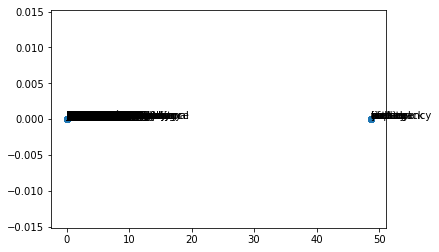

In [109]:
plt.show()